In [1]:
# For interactive plots, comment the next line
%pylab inline

# For interactive plots, uncomment the next line
# %pylab ipympl

Populating the interactive namespace from numpy and matplotlib


# Introduction

This notebook demonstrates how to load array data (numerical list, numpy array) data collected into a PODPAC node.

<small>*For instructions on using Jupyter notebooks, see the [README.md](../../README.md) file.*</small>

## Setup

Make sure you have PODPAC installed:

```
$ pip install podpac
```


## Array Data

In [2]:
from podpac.data import Array
from podpac import Coordinates
import numpy as np

# mock data
data = np.random.rand(5, 5)
data

D:\podpac-1.2.0\miniconda\envs\podpac\lib\site-packages\xarray\core\merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


array([[0.14567907, 0.40172636, 0.85504888, 0.87316779, 0.99321509],
       [0.04171965, 0.27913047, 0.88984643, 0.78670175, 0.64545122],
       [0.33916725, 0.87852559, 0.39898781, 0.86715479, 0.94767488],
       [0.36687085, 0.43361617, 0.11747361, 0.91600244, 0.25714857],
       [0.63463572, 0.34049427, 0.13672328, 0.57824223, 0.18938057]])

In [3]:
# create native coordinates for data
lat = np.linspace(-10, 10, 5)
lon = np.linspace(-10, 10, 5)
native_coords = Coordinates([lat, lon], ['lat', 'lon'])
native_coords

Coordinates (EPSG:4326)
	lat: ArrayCoordinates1d(lat): Bounds[-10.0, 10.0], N[5], ctype['midpoint']
	lon: ArrayCoordinates1d(lon): Bounds[-10.0, 10.0], N[5], ctype['midpoint']

In [4]:
# create Array DataSource node
node = Array(source=data, native_coordinates=native_coords)
node

Array DataSource
	source: 
[[0.14567907 0.40172636 0.85504888 0.87316779 0.99321509]
 [0.04171965 0.27913047 0.88984643 0.78670175 0.64545122]
 [0.33916725 0.87852559 0.39898781 0.86715479 0.94767488]
 [0.36687085 0.43361617 0.11747361 0.91600244 0.25714857]
 [0.63463572 0.34049427 0.13672328 0.57824223 0.18938057]]
	native_coordinates: 
		lat: ArrayCoordinates1d(lat): Bounds[-10.0, 10.0], N[5], ctype['midpoint']
		lon: ArrayCoordinates1d(lon): Bounds[-10.0, 10.0], N[5], ctype['midpoint']
	interpolation: nearest

In [5]:
# evaluate this note at its native coordinates
output = node.eval(node.native_coordinates)
output

<xarray.UnitsDataArray (lat: 5, lon: 5)>
array([[0.145679, 0.401726, 0.855049, 0.873168, 0.993215],
       [0.04172 , 0.27913 , 0.889846, 0.786702, 0.645451],
       [0.339167, 0.878526, 0.398988, 0.867155, 0.947675],
       [0.366871, 0.433616, 0.117474, 0.916002, 0.257149],
       [0.634636, 0.340494, 0.136723, 0.578242, 0.189381]])
Coordinates:
  * lat      (lat) float64 -10.0 -5.0 0.0 5.0 10.0
  * lon      (lon) float64 -10.0 -5.0 0.0 5.0 10.0
Attributes:
    layer_style:  <podpac.core.style.Style object at 0x000002DDF140C6A0>
    crs:          EPSG:4326

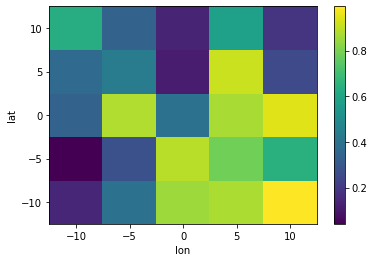

In [6]:
output.plot()
pass

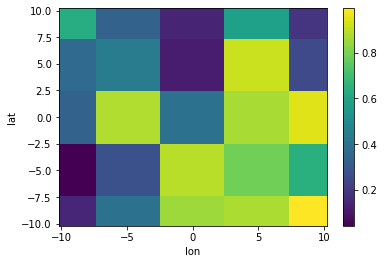

In [7]:
# scale down data
# default interpolation is nearest neighbor
coords = Coordinates([np.linspace(-10, 10, 50), np.linspace(-10, 10, 50)], ['lat', 'lon'])
output = node.eval(coords)
output.plot()
pass

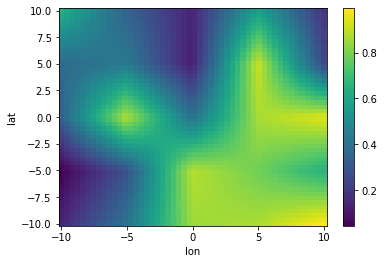

In [8]:
# scale down and use bilinear interpolation
node.interpolation = 'bilinear'
output = node.eval(coords)
output.plot()
pass